<a href="https://colab.research.google.com/github/AshmitA-8/Ashmita-8/blob/main/fraud_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, LabelEncoder
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from joblib import load, dump
import time

In [ ]:
#dataset loading
train_transaction = pd.read_csv('train_transaction.csv')
train_identity = pd.read_csv('train_identity.csv')
test_transaction = pd.read_csv('test_transaction.csv')
test_identity = pd.read_csv('test_identity.csv')

In [ ]:
# Merge transaction and identity data
train_data = pd.merge(train_transaction, train_identity, on='TransactionID', how='left')
test_data = pd.merge(test_transaction, test_identity, on='TransactionID', how='left')

print(train_data.head()), print(test_data.head())

   TransactionID  isFraud  TransactionDT  TransactionAmt ProductCD  card1  \
0        2987000        0          86400            68.5         W  13926   
1        2987001        0          86401            29.0         W   2755   
2        2987002        0          86469            59.0         W   4663   
3        2987003        0          86499            50.0         W  18132   
4        2987004        0          86506            50.0         H   4497   

   card2  card3       card4  card5  ...                id_31  id_32  \
0    NaN  150.0    discover  142.0  ...                  NaN    NaN   
1  404.0  150.0  mastercard  102.0  ...                  NaN    NaN   
2  490.0  150.0        visa  166.0  ...                  NaN    NaN   
3  567.0  150.0  mastercard  117.0  ...                  NaN    NaN   
4  514.0  150.0  mastercard  102.0  ...  samsung browser 6.2   32.0   

       id_33           id_34  id_35 id_36 id_37  id_38  DeviceType  \
0        NaN             NaN    NaN   Na

(None, None)

In [ ]:
#Data Overview
print(train_data.tail()),print(test_data.tail())

       TransactionID  isFraud  TransactionDT  TransactionAmt ProductCD  card1  \
11837        2998837        0         342127           87.95         W   9550   
11838        2998838        0         342129          117.00         W  10057   
11839        2998839        0         342130           24.47         C  15885   
11840        2998840        0         342139           25.00         W  11207   
11841        2998841        0         342147          150.00         H   9803   

       card2  card3       card4  card5  ...                    id_31  id_32  \
11837  369.0  150.0  mastercard  224.0  ...                      NaN    NaN   
11838  225.0  150.0  mastercard  224.0  ...                      NaN    NaN   
11839  545.0  185.0        visa  138.0  ...  chrome 62.0 for android    NaN   
11840  361.0  150.0        visa  226.0  ...                      NaN    NaN   
11841  583.0  150.0        visa  226.0  ...                edge 15.0   24.0   

           id_33           id_34  id_3

(None, None)

In [ ]:
train_data.describe(),test_data.describe()

(       TransactionID       isFraud  TransactionDT  TransactionAmt  \
 count   1.184200e+04  11842.000000   11842.000000    11842.000000   
 mean    2.992920e+06      0.027191  208983.257473      127.839045   
 std     3.418635e+03      0.162648   73205.452420      209.678863   
 min     2.987000e+06      0.000000   86400.000000        1.896000   
 25%     2.989960e+06      0.000000  151097.000000       43.970000   
 50%     2.992920e+06      0.000000  185496.500000       70.329000   
 75%     2.995881e+06      0.000000  259681.000000      125.000000   
 max     2.998841e+06      1.000000  342147.000000     4007.950000   
 
               card1         card2         card3         card5         addr1  \
 count  11842.000000  11706.000000  11841.000000  11808.000000  10760.000000   
 mean    9808.321314    350.462242    152.712186    200.603066    292.039870   
 std     4798.090015    158.243485     10.252130     39.111703    103.752931   
 min     1011.000000    100.000000    100.000000

In [ ]:
train_data.columns.tolist(), test_data.columns.tolist()

(['TransactionID',
  'isFraud',
  'TransactionDT',
  'TransactionAmt',
  'ProductCD',
  'card1',
  'card2',
  'card3',
  'card4',
  'card5',
  'card6',
  'addr1',
  'addr2',
  'dist1',
  'dist2',
  'P_emaildomain',
  'R_emaildomain',
  'C1',
  'C2',
  'C3',
  'C4',
  'C5',
  'C6',
  'C7',
  'C8',
  'C9',
  'C10',
  'C11',
  'C12',
  'C13',
  'C14',
  'D1',
  'D2',
  'D3',
  'D4',
  'D5',
  'D6',
  'D7',
  'D8',
  'D9',
  'D10',
  'D11',
  'D12',
  'D13',
  'D14',
  'D15',
  'M1',
  'M2',
  'M3',
  'M4',
  'M5',
  'M6',
  'M7',
  'M8',
  'M9',
  'V1',
  'V2',
  'V3',
  'V4',
  'V5',
  'V6',
  'V7',
  'V8',
  'V9',
  'V10',
  'V11',
  'V12',
  'V13',
  'V14',
  'V15',
  'V16',
  'V17',
  'V18',
  'V19',
  'V20',
  'V21',
  'V22',
  'V23',
  'V24',
  'V25',
  'V26',
  'V27',
  'V28',
  'V29',
  'V30',
  'V31',
  'V32',
  'V33',
  'V34',
  'V35',
  'V36',
  'V37',
  'V38',
  'V39',
  'V40',
  'V41',
  'V42',
  'V43',
  'V44',
  'V45',
  'V46',
  'V47',
  'V48',
  'V49',
  'V50',
  'V51',
 

In [ ]:
train_data.nunique(),test_data.nunique()

(TransactionID     11842
 isFraud               2
 TransactionDT     11438
 TransactionAmt     1511
 ProductCD             5
                   ...  
 id_36                 2
 id_37                 2
 id_38                 2
 DeviceType            2
 DeviceInfo          212
 Length: 434, dtype: int64,
 TransactionID     11069
 TransactionDT     10809
 TransactionAmt     1112
 ProductCD             5
 card1              2259
                   ...  
 id-36                 2
 id-37                 2
 id-38                 2
 DeviceType            2
 DeviceInfo          161
 Length: 433, dtype: int64)

In [ ]:
train_data.info(),test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11842 entries, 0 to 11841
Columns: 434 entries, TransactionID to DeviceInfo
dtypes: float64(399), int64(4), object(31)
memory usage: 39.2+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11069 entries, 0 to 11068
Columns: 433 entries, TransactionID to DeviceInfo
dtypes: float64(399), int64(3), object(31)
memory usage: 36.6+ MB


(None, None)

In [ ]:
train_data.isnull().sum(),test_data.isnull().sum()

(TransactionID        0
 isFraud              0
 TransactionDT        0
 TransactionAmt       0
 ProductCD            0
                   ... 
 id_36             9218
 id_37             9218
 id_38             9218
 DeviceType        9218
 DeviceInfo        9553
 Length: 434, dtype: int64,
 TransactionID         0
 TransactionDT         0
 TransactionAmt        0
 ProductCD             0
 card1                 0
                   ...  
 id-36              9777
 id-37              9777
 id-38              9777
 DeviceType         9781
 DeviceInfo        10039
 Length: 433, dtype: int64)

In [ ]:
#Exploratory Data Analysis (EDA):

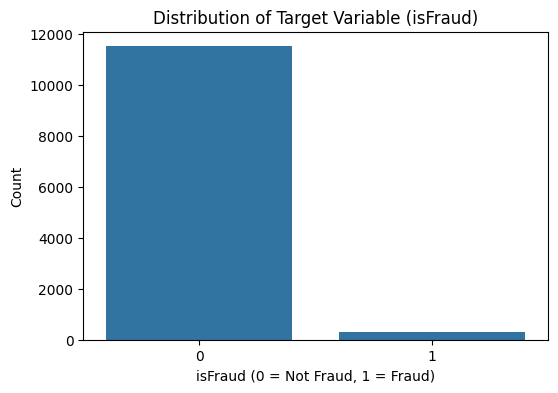

In [ ]:
# Distribution of the target variable
plt.figure(figsize=(6, 4))
sns.countplot(x='isFraud', data=train_data)
plt.title('Distribution of Target Variable (isFraud)')
plt.xlabel('isFraud (0 = Not Fraud, 1 = Fraud)')
plt.ylabel('Count')
plt.show()

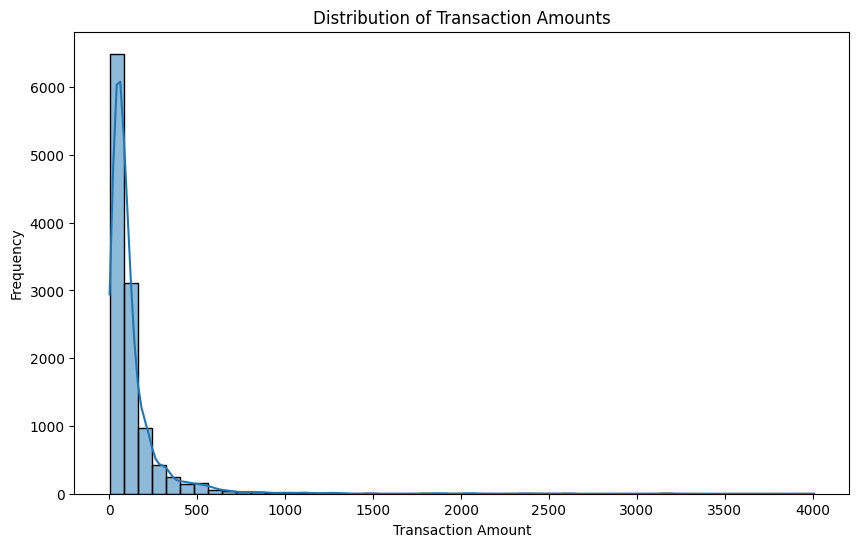

In [ ]:
# Distribution of transaction amounts
plt.figure(figsize=(10, 6))
sns.histplot(train_data['TransactionAmt'], bins=50, kde=True)
plt.title('Distribution of Transaction Amounts')
plt.xlabel('Transaction Amount')
plt.ylabel('Frequency')
plt.show()

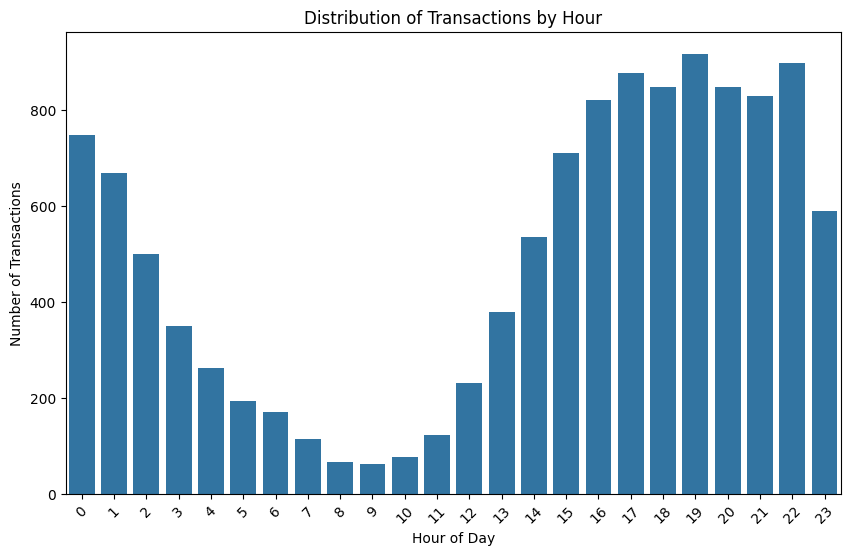

In [ ]:
# Convert 'TransactionDT' to datetime
train_data['TransactionDT'] = pd.to_datetime(train_data['TransactionDT'], unit='s')

# Extract time features
train_data['TransactionHour'] = train_data['TransactionDT'].dt.hour
train_data['TransactionWeekday'] = train_data['TransactionDT'].dt.weekday

# Visualize the distribution of transactions by hour
plt.figure(figsize=(10, 6))
sns.countplot(x='TransactionHour', data=train_data)
plt.title('Distribution of Transactions by Hour')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Transactions')
plt.xticks(rotation=45)
plt.show()

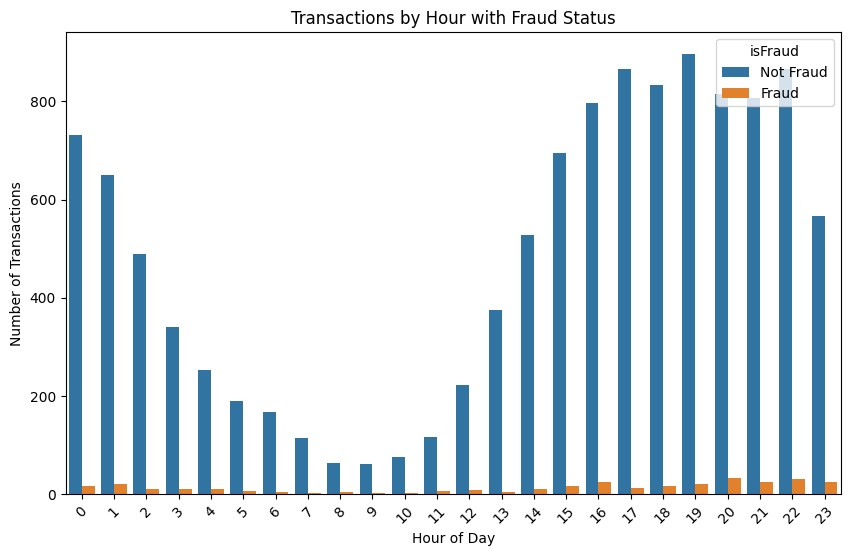

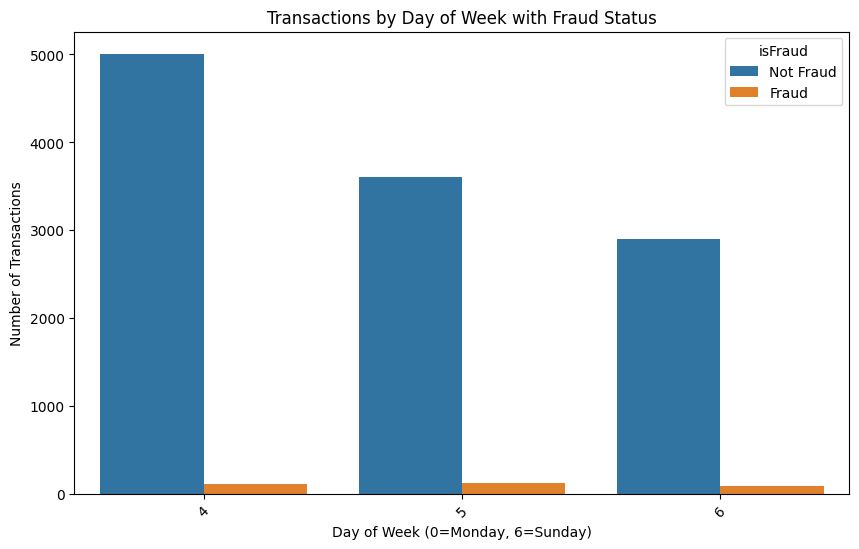

In [ ]:
# Analyze the relationship between time features and the target variable
plt.figure(figsize=(10, 6))
sns.countplot(x='TransactionHour', hue='isFraud', data=train_data)
plt.title('Transactions by Hour with Fraud Status')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Transactions')
plt.legend(title='isFraud', loc='upper right', labels=['Not Fraud', 'Fraud'])
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(10, 6))
sns.countplot(x='TransactionWeekday', hue='isFraud', data=train_data)
plt.title('Transactions by Day of Week with Fraud Status')
plt.xlabel('Day of Week (0=Monday, 6=Sunday)')
plt.ylabel('Number of Transactions')
plt.legend(title='isFraud', loc='upper right', labels=['Not Fraud', 'Fraud'])
plt.xticks(rotation=45)
plt.show()

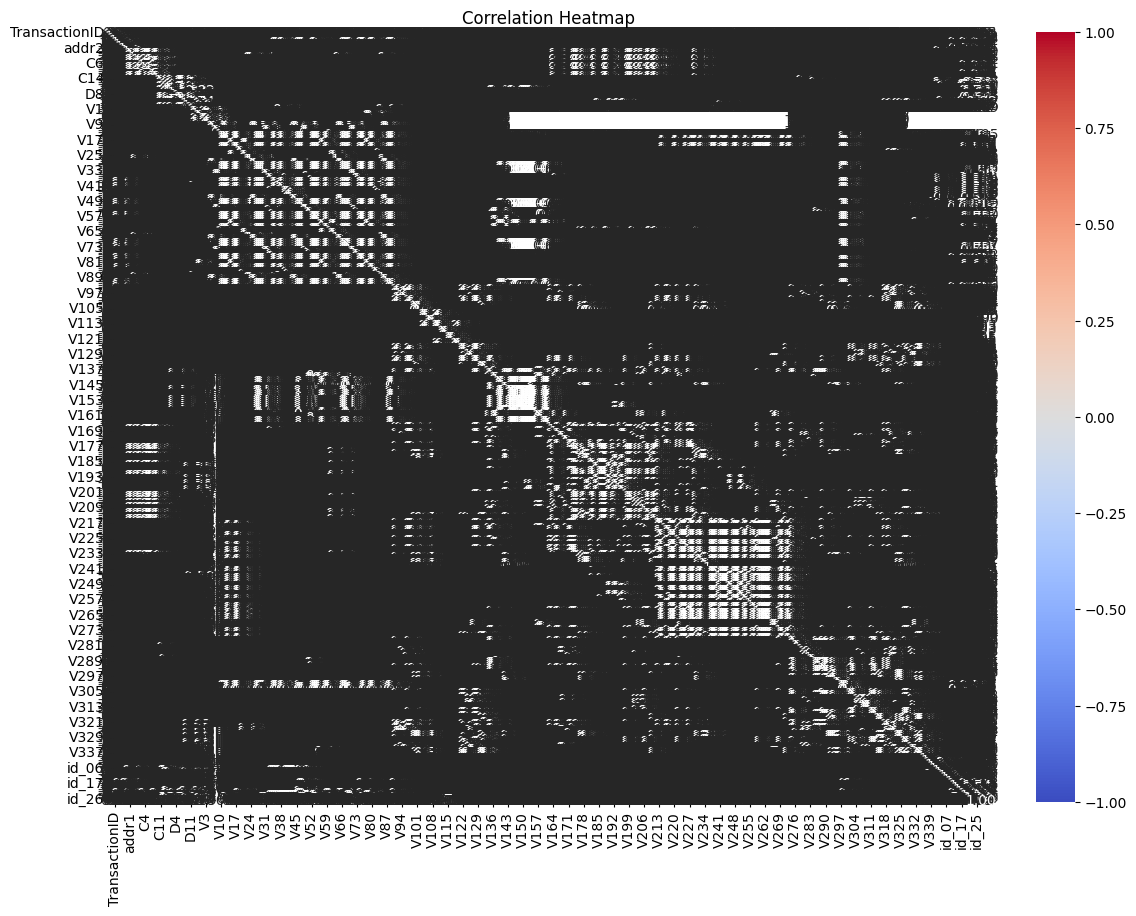

In [ ]:
# Correlation heatmap for numerical features
numerical_features = train_data.select_dtypes(include=['float64', 'int64']).columns
correlation_matrix = train_data[numerical_features].corr()

plt.figure(figsize=(14, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

In [ ]:
#Data Preprocessing:

# Check for missing values
missing_values = train_data.isnull().sum().sort_values(ascending=False)
print("Missing Values:\n", missing_values[missing_values > 0])

# Fill missing values
train_data = train_data.fillna(0)

# Encode categorical features
label_encoder = LabelEncoder()
for col in train_data.select_dtypes(include=['object']).columns:
    train_data[col] = train_data[col].astype(str)
    train_data[col] = label_encoder.fit_transform(train_data[col])

# Scale numerical features
scaler = StandardScaler()
num_cols = train_data.select_dtypes(include=['float64', 'int64']).columns
train_data[num_cols] = scaler.fit_transform(train_data[num_cols])

# Split the data into features and target variable
X = train_data.drop('isFraud', axis=1)
y = train_data['isFraud']

Missing Values:
 id_24    11778
id_21    11772
id_08    11772
id_07    11772
id_22    11772
         ...  
card6        1
V319         1
V320         1
V321         1
V318         1
Length: 331, dtype: int64


In [ ]:
# Fill missing values in test data
test_data = test_data.fillna(0)

# Encode categorical features in test data
for col in test_data.select_dtypes(include=['object']).columns:
   test_data[col] = test_data[col].astype(str)
   test_data[col] = label_encoder.fit_transform(test_data[col])


# Scale numerical features in test data
scaler = StandardScaler()
num_cols = test_data.select_dtypes(include=['float64', 'int64']).columns
test_data[num_cols] = scaler.fit_transform(test_data[num_cols])

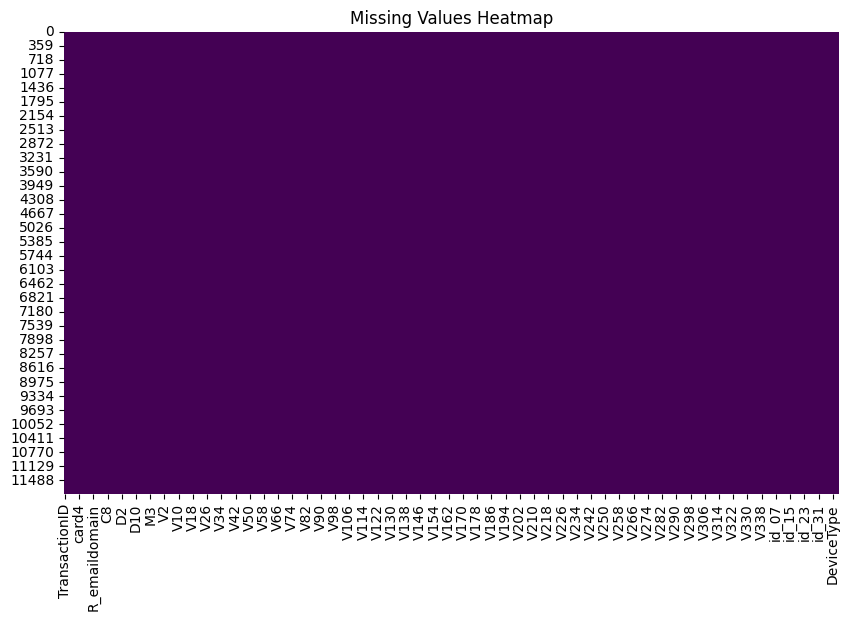

In [ ]:
plt.figure(figsize=(10, 6))
sns.heatmap(train_data.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values Heatmap')
plt.show()

In [ ]:
#Handling class Imbalance

# Assuming 'y' is your target variable and it's continuous
# Convert it to discrete classes if applicable.
# Here's an example using a simple threshold:
threshold = 0  # Adjust this threshold as needed
y_discrete = (y > threshold).astype(int)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y_discrete, test_size=0.2, random_state=42, stratify=y_discrete
)
# Identify and handle datetime columns in X_train
datetime_cols = X_train.select_dtypes(include=['datetime64']).columns
for col in datetime_cols:
    # Option 1: Drop datetime columns if not crucial
    # X_train = X_train.drop(col, axis=1)

    # Option 2: Convert datetime to numerical features (e.g., Unix timestamp)
    X_train[col] = X_train[col].astype('int64')

# Apply SMOTE to the training data
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

# Check the class distribution after handling imbalance
print("Class distribution after SMOTE:")
print(pd.Series(y_resampled).value_counts())

Class distribution after SMOTE:
isFraud
0    9215
1    9215
Name: count, dtype: int64


In [ ]:
#Traing Model

# Initialize models
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Random Forest': RandomForestClassifier(random_state=42),
    'XGBoost': XGBClassifier(objective='binary:logistic', random_state=42)
}
# Train and evaluate each model
results = {}
for model_name, model in models.items():
    # Train the model
    model.fit(X_resampled, y_resampled)



     # Make predictions
    y_pred = model.predict(X_test)

    # Calculate evaluation metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)

    # Store results
    results[model_name] = {
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1
    }
    # Save the trained model
    import joblib
joblib.dump(models['XGBoost'], 'fraud_detection.joblib') # Example: saving the XGBoost model

['fraud_detection.joblib']

                     Accuracy  Precision   Recall  F1 Score
Logistic Regression  0.027016   0.027016  1.00000  0.052610
Random Forest        0.978894   0.888889  0.25000  0.390244
XGBoost              0.984382   0.909091  0.46875  0.618557


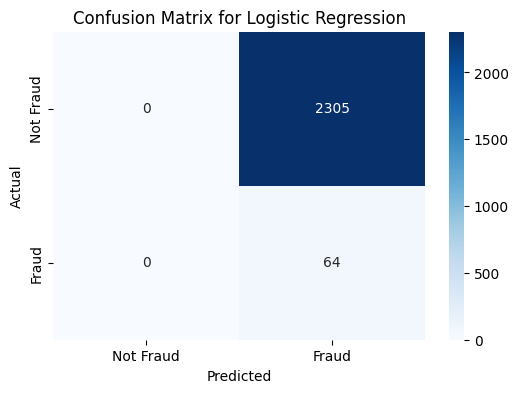

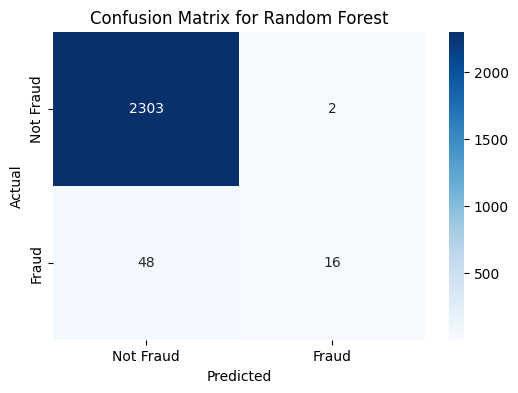

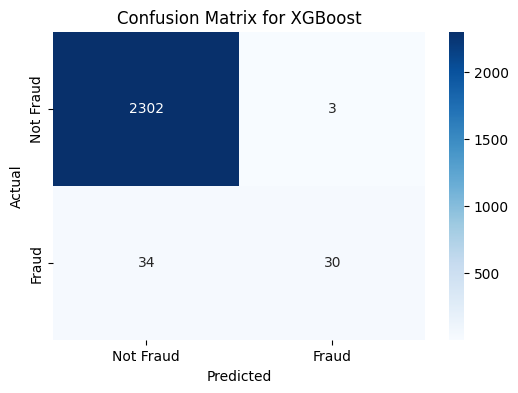

In [ ]:
# Display results

results_df = pd.DataFrame(results).T
print(results_df)

# Plot confusion matrices for each model
for model_name, model in models.items():
    y_pred = model.predict(X_test)
    conf_matrix = confusion_matrix(y_test, y_pred)

    plt.figure(figsize=(6, 4))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
                xticklabels=['Not Fraud', 'Fraud'],
                yticklabels=['Not Fraud', 'Fraud'])
    plt.title(f'Confusion Matrix for {model_name}')
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()

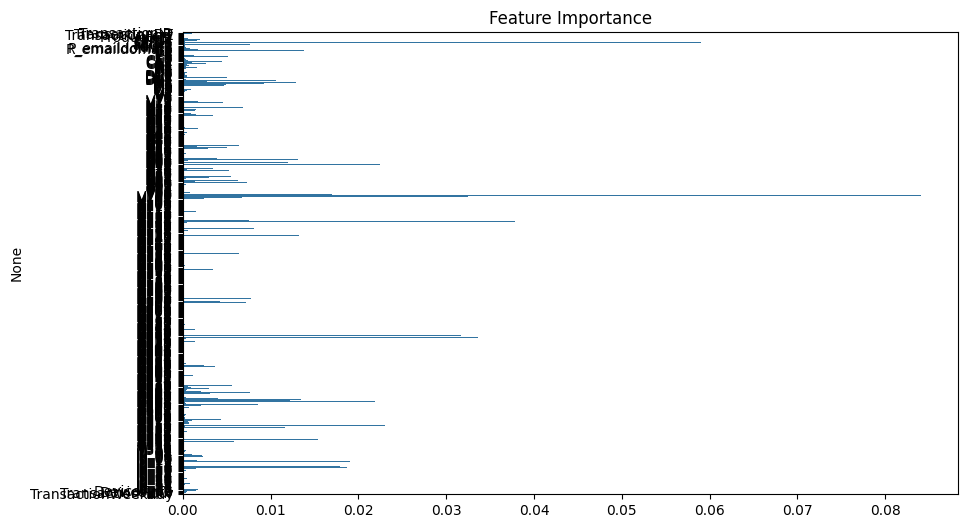

In [ ]:
# Feature Importance(Use the feature importance attribute of the XGBoost model to determine which features are most influential)

importances = model.feature_importances_
features = X.columns

plt.figure(figsize=(10, 6))
sns.barplot(x=importances, y=features)
plt.title('Feature Importance')
plt.show()


In [ ]:
#Model Deployment

# Load the trained model
model = load('fraud_detection.joblib')
# Define the preprocessing function
def preprocess_data(data):
    # Implement your preprocessing steps here
    # Example: Fill missing values, encode categorical features, scale numerical features
    data.fillna(0, inplace=True)  # Simple example for missing values
    # Assume categorical_cols and num_cols are defined globally
    for col in categorical_cols:
        data[col] = label_encoder.transform(data[col].astype(str))
    data[num_cols] = scaler.transform(data[num_cols])
    return data

# Function to detect fraud in real-time
def detect_fraud(transaction_data):
    # Preprocess the transaction data
    transaction_data = preprocess_data(transaction_data)

    # Make predictions
    predictions = model.predict(transaction_data)
    return predictions
# Real-time fraud detection loop
def monitor_transactions():
    while True:
        # Fetch the latest transaction data
        new_transaction = pd.read_csv('train_transactio.csv')  # Replace with your data source

        # Detect fraud in the new transaction
        fraud_predictions = detect_fraud(new_transaction)

        # Process predictions
        for i, prediction in enumerate(fraud_predictions):
            if prediction == 1:
                print(f"Transaction {i}: Potential Fraud Detected")
                # Implement alert mechanism here if needed

        # Wait for a specified interval before checking the next transaction
        time.sleep(10)  # Wait for 10 seconds before checking the next transaction


In [ ]:
# Monitoring and Continuous Improvement:

# Function to update the model with new data
def update_model(new_data):
    # Preprocess the new data
    new_data = preprocess_data(new_data)

    # Extract features and target variable
    X_new = new_data.drop('isFraud', axis=1)
    y_new = new_data['isFraud']

    # Update the model with the new data
    model.fit(X_new, y_new)

    # Save the updated model
    dump(model, 'fraud_detection_model.joblib')

# Periodic model retraining loop
def retrain_model():
    while True:
        # Fetch the latest transaction data for retraining
        new_data = pd.read_csv('new_transactions.csv')  # Replace with your data source

        # Update the model with the new data
        update_model(new_data)
                # Wait for a specified interval before retraining again
        time.sleep(3600)  # Wait for 1 hour before retraining

# Start the monitoring and continuous improvement loop
# monitor_transactions()
# retrain_model()

